# Obtaining a list of equities tickers and the corresponding timeseries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install --quiet yfinance ##--quiet mutes the package list as it’s installing

In [ ]:
import os
import json
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
import matplotlib.pyplot as plt


from datetime import datetime
''
# this workaround let's us override pandas_datareader with yfinance,
# although we can also use yfinance directly
import yfinance as yf
import pandas_datareader.data as web; yf.pdr_override()

In [ ]:
start_date = '2023-03-02'
end_date  = '2023-03-20'

data_dir = '/data/'

#A Timeline on the SVB Crash and why we Chose it

According to Investopedia, SVB Financial Group was removed from the S&P 500 Index due to the collapse its bank. So the most recent rebalancing of S&P 500 was announced on March 10, 2023.

The bank, mostly focused on venture capital funds and small tech startups had a huge boom during the pandemic. The bank then invested all of its profits into low-return bonds. However, after aggresive federal rate hikes the bonds quickly lost their value, causing panic. SVB no longer had the cash to give to the companies withdrawing their money and the FDIC took over the bank.







Initally the FDIC could only insure up to 250k but that wasn't enough, causing fear of a 2008 recession. The fed, treasury, and FDIC then announced a new emergency lending program so every company could get their money back.

##Timeseries Length
originally we were going to do the entire month of march but because there was a distinct end it didn't seem necesarry to do the full month. We decided to do a week before SVB announced their losses and then around a week after the emergency lending program was announced

##What other events did we consider?



We wanted to pick an event that had both positive and negative affects on the S&P500 companies and had a distinct beginning and end.

We considered doing the pandemic but it was too long and the rise of chatgpt but there were too many factors to consider (3.5 release, 4.0 release, 3.5 gets worse)
https://arxiv.org/pdf/2307.09009.pdf

In [ ]:
names = ['','SVB announces 1.8 billion loss on bonds', 'SVB shares fall 60%, depositors withdraw money',
         'FDIC takes over SVB only insures up to 250k', 'Fed, Tresury, & FDIC say theyll cover all deposits',
         'Bank stocks bounced back in early trading','',
        ]

dates = ['2023-03-07','2023-03-08', '2023-03-09', '2023-03-10',
             '2023-03-12', '2023-03-14','2023-03-15'
        ]

    # Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

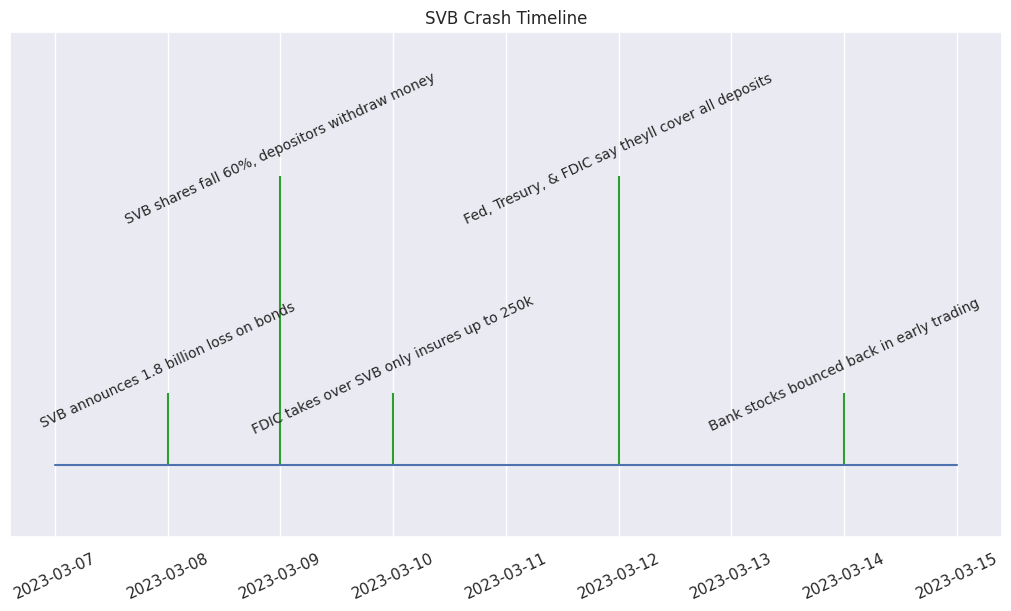

In [ ]:
levels = np.tile([0, 1,4, 1, 4,1, 0], int(np.ceil(len(dates)/5)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), layout="constrained")
ax.set(title="SVB Crash Timeline")

ax.vlines(dates, 0, levels, color="tab:green")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates))  # Baseline and markers on it.



for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l), xytext=(0, 1* 20),# 0 means no horizontal offset and 1*20 means annotation will be 20 spaces from the end of the stem
                textcoords="offset points", horizontalalignment="center",
                verticalalignment="center", rotation=25, fontsize = 10)  # Rotate the text by 45 degrees

ax.set_ylim(-1, 6)
ax.yaxis.set_visible(False)
plt.xticks(rotation=25)
plt.show()

## Get list of companies in S&P500

We will obtain and store the list of the constituents from Wikipedia.

In [ ]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table   = data[0]
#print (table)
symbols = list(table.Symbol.values) ##companies

print("{} symbols in total".format(len(symbols)))


503 symbols in total


## Download price timeseries

Now that we have a list of ticker symbols, we can download the corresponding timeseries from Yahoo Finance.

In [ ]:
symbols.append('SPY')

In [ ]:
dates = '_{}--{}'.format(start_date, end_date)
dates

'_2023-03-01--2023-03-31'

In [ ]:
'''
try:
  os.mkdir(data_dir)
except:
  print("Dir Error")
  '''
os.mkdir(data_dir)

FileExistsError: ignored

In [ ]:
#!ls /data

##Trying to get other types of timeseries data from yfinance
i want to get daily market cap i think

In [ ]:
ticker = yf.Ticker("AAPL")
history = ticker.history(period="30d")
market_cap = history["Close"] * ticker.info["marketCap"]
market_cap.head()

Date
2023-08-04 00:00:00-04:00    4.964691e+14
2023-08-07 00:00:00-04:00    4.879031e+14
2023-08-08 00:00:00-04:00    4.904947e+14
2023-08-09 00:00:00-04:00    4.861027e+14
2023-08-10 00:00:00-04:00    4.855025e+14
Name: Close, dtype: float64

below w

In [ ]:
symbols = sorted(symbols)
print("Downloading {} files".format(len(symbols)))
for i, symbol in enumerate(symbols):
    try:
        df = web.get_data_yahoo(symbol, start_date, end_date,)
        # df = web.DataReader(symbol,'yahoo', start_date, end_date)
        df = df[['Adj Close','Volume']]
        df.to_csv(os.path.join(data_dir, "{}.csv".format(symbol)))
    except KeyError:
      print("Error for {}".format(symbol))
      pass
print("Stored {} files".format(i+1))



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-01 -> 2023-03-31)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['KVUE']: Exception("%ticker%: Data doesn't exist for startDate = 1677646800, endDate = 1680235200")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

In [ ]:
# Printing a sample dataframe
idx = np.random.randint(len(symbols))
print("History for {}".format(symbols[idx]))
df = pd.read_csv(os.path.join(data_dir, symbols[idx]+".csv")).set_index('Date')
df.head()

History for EPAM


,Adj Close,Volume
Date,,
2023-03-01,305.589996,266500
2023-03-02,304.250000,417200
2023-03-03,305.989990,471000
2023-03-06,310.339996,313800
2023-03-07,305.329987,294900


## Pre-process Financial Timeseries

In [ ]:
index = pd.date_range(start=start_date, end=end_date, freq='D')     # initialize an empty DateTime Index and so each index is a date over the month
df_price = pd.DataFrame(index=index, columns=symbols)               # initialize empty dataframes
df_volume = pd.DataFrame(index=index, columns=symbols)

In [ ]:
# Aggregate all symbols into a price dataframe and volume dataframe
#for each ticker symbol get that csv file, set the index of that to the datetimes
#for each column in df_price is that company's adj price every datetime
for symbol in symbols:
    symbol_df = pd.read_csv(os.path.join(data_dir, symbol+".csv")).set_index('Date')
    symbol_df.index = pd.to_datetime(symbol_df.index)

    df_price[symbol] = symbol_df['Adj Close']
    df_volume[symbol] = symbol_df['Volume']

### Removing NaNs

In [ ]:
# Let's drop the dates where all the stocks are NaNs, ie., weekends/holidays where no trading occured
df_price.dropna(how='all', inplace=True)
df_volume.dropna(how='all', inplace=True)
df_price.dropna(inplace=True, axis=1)
df_volume.dropna(inplace=True, axis=1)
assert((df_price.index == df_volume.index).all())

In [ ]:
True in pd.isna(df_price)

False

### Storing the cleaned dataframes

In [ ]:
#so instead of 500 csv files its now two
df_price.to_csv(os.path.join(data_dir, "prices.csv"), index_label='date')
df_volume.to_csv(os.path.join(data_dir, "volume.csv"))

#finds percent change between current price and prior
df_price_pct = df_price.pct_change()[1:]
df_price_pct.to_csv(os.path.join(data_dir, "prices_pct.csv"), index_label='date')
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-02,0.030252,0.005614,0.004129,-0.005732,0.017852,-0.000986,0.006336,0.031294,0.008083,0.016784,...,0.010604,0.016912,0.004599,0.008565,0.011475,0.019651,0.007454,0.012304,-0.042228,0.006027
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.017734,0.005642,0.014853,0.031604,0.008993,0.006082,...,0.021339,0.011812,0.012657,0.028132,0.016333,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,-0.016276,0.005610,0.001597,0.008662,-0.003919,0.004194,...,-0.003712,-0.000768,0.008864,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,-0.020516,...,-0.019411,-0.022137,-0.019330,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.005801,-0.009861,-0.002044,0.003016,0.008814,0.002258,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639


In [ ]:
df_price.pct_change()[1:].to_csv(os.path.join(data_dir, 'prices_pct'+dates+'.csv'), index_label='date')
df_price.to_csv(os.path.join(data_dir, 'prices'+dates+'.csv'), index_label='date')

## Obtain Percentage Change and Correlation

We need to convert prices to percent change in price as opposed to the actual \$ price. This is because stocks with very similar prices can behave very differently and vice-versa.
For e.g., if a stock moves from \$100 to \$110, we want the price column to say 10% (indicating the change).

However, for volume, we will retain magnitude.

Spearman correlation

In [ ]:
df_price_pct = df_price.pct_change().dropna(how='all')
df_volume_pct = df_volume.pct_change().dropna(how='all')

### Calculate Correlations

In [ ]:
price_corr = df_price_pct.corr()
volume_corr = df_volume.corr()

In [ ]:
price_corr.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.634246,0.608213,0.281894,0.795025,0.754294,0.403667,0.643184,0.554535,0.797062,...,0.719931,0.308945,0.688509,0.683572,0.806951,0.708480,0.622098,0.718135,0.357758,0.711038
AAL,0.634246,1.000000,0.348835,0.020831,0.377534,0.668225,0.444541,0.601988,0.519899,0.452781,...,0.741228,-0.138332,0.668906,0.465695,0.627328,0.155346,0.283692,0.674735,0.642878,0.386871
AAPL,0.608213,0.348835,1.000000,0.430718,0.682305,0.514234,0.499003,0.681889,0.650518,0.478374,...,0.661787,0.433746,0.363922,0.644338,0.550326,0.562939,0.476474,0.618440,0.252991,0.572950
ABBV,0.281894,0.020831,0.430718,1.000000,0.555869,0.332321,0.333260,0.347618,0.208739,0.359141,...,0.389480,0.323913,0.262832,0.660758,0.372891,0.391198,0.690442,0.205876,0.089707,0.330131
ABT,0.795025,0.377534,0.682305,0.555869,1.000000,0.513238,0.512720,0.568680,0.560641,0.614133,...,0.617616,0.514683,0.437016,0.654384,0.671478,0.745977,0.669482,0.623132,0.178526,0.631607


Text(0.5, 1.0, 'Correlation heatmap for Volume')

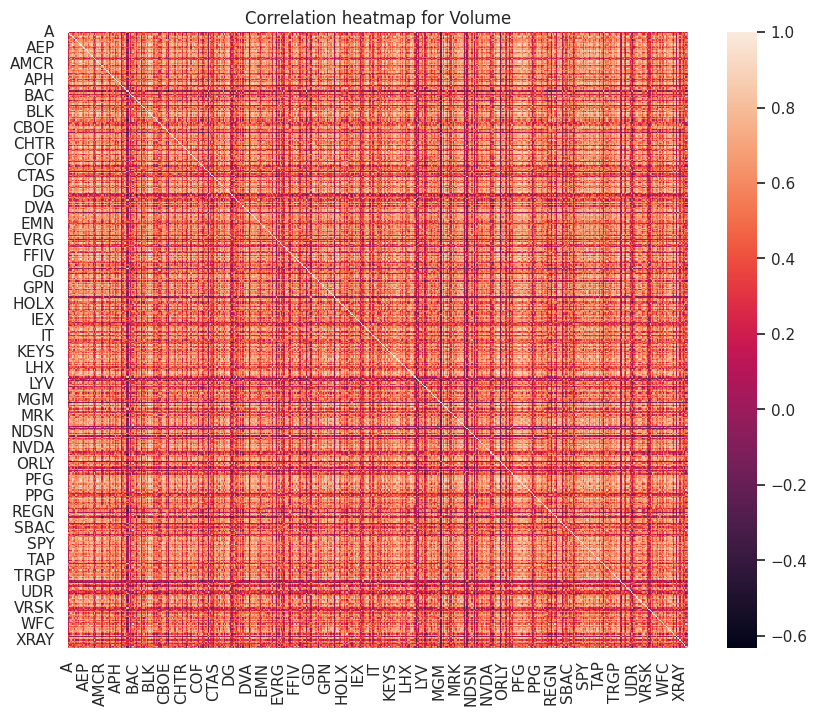

In [ ]:
sns.heatmap(volume_corr).set_title("Correlation heatmap for Volume")

Text(0.5, 1.0, 'Correlation heatmap for Price Changes')

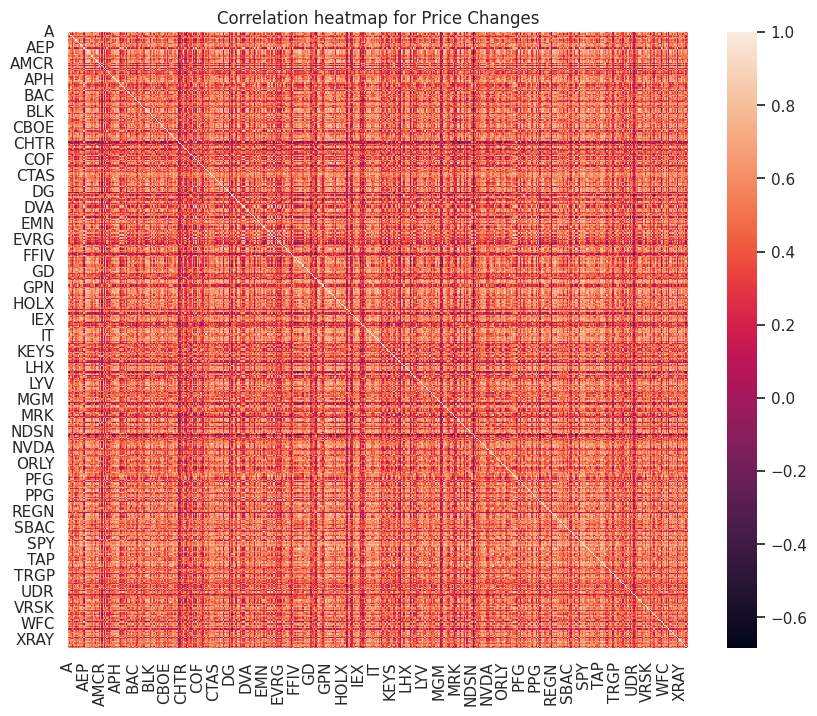

In [ ]:
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes")

### Examining correlations further

In [ ]:
df_price_pct['JPM'].head()

2023-03-02   -0.010382
2023-03-03    0.018360
2023-03-06   -0.005847
2023-03-07   -0.029408
2023-03-08   -0.005915
Name: JPM, dtype: float64

Text(0.5, 1.0, 'Price Change Scatterplot between JPM and GS. Correlation = 0.6524120937165045')

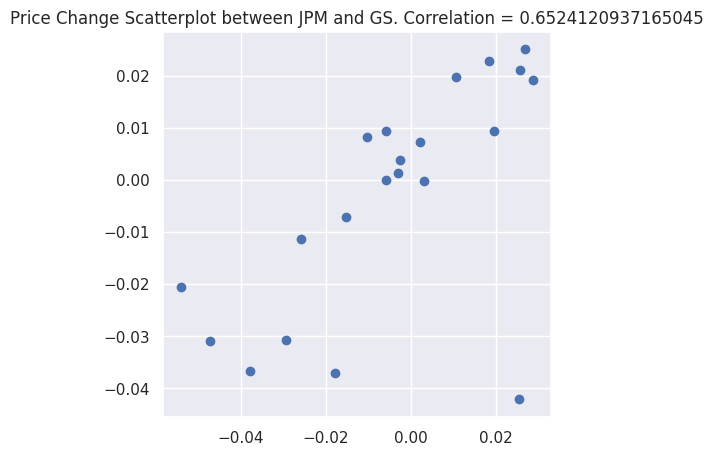

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(df_price_pct['JPM'], df_price_pct['GS'])
plt.title('Price Change Scatterplot between JPM and GS. Correlation = {}'.format(price_corr['JPM']['GS']))

Summary statistics for the df_price_pct and df_volume dataframes and then boxplots to find outliers

In [ ]:
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2023-03-02,0.030252,0.005614,0.004129,-0.005732,0.017852,-0.000986,0.006336,0.031294,0.008083,0.016784,...,0.010604,0.016912,0.004599,0.008565,0.011475,0.019651,0.007454,0.012304,-0.042228,0.006027
2023-03-03,0.015953,0.014888,0.035090,0.010882,0.017734,0.005642,0.014853,0.031604,0.008993,0.006082,...,0.021339,0.011812,0.012657,0.028132,0.016333,0.007693,0.026262,0.011076,0.019044,0.011745
2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,-0.016276,0.005610,0.001597,0.008662,-0.003919,0.004194,...,-0.003712,-0.000768,0.008864,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
2023-03-07,-0.020247,0.014888,-0.014496,-0.015134,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,-0.020516,...,-0.019411,-0.022137,-0.019330,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.005801,-0.009861,-0.002044,0.003016,0.008814,0.002258,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639


# Summary Stats and Outliers?
The below box plot is showing the price percentage change averaged across all 500 companies for each day, there's no outliers so it doesn't seem like theres one day in the timeseries where all the companies are all having drastic movement.




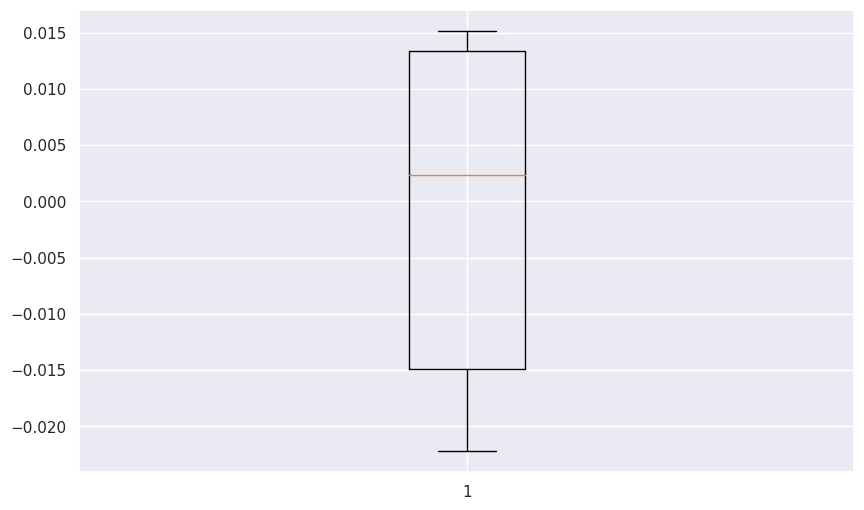

count    21.000000
mean     -0.000549
std       0.013304
min      -0.022167
25%      -0.014916
50%       0.002325
75%       0.013373
max       0.015173
Name: average, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_price_plotting = df_price_pct
df_price_plotting['average'] = df_price_plotting.mean(axis=1)
#average across all companies per day



# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

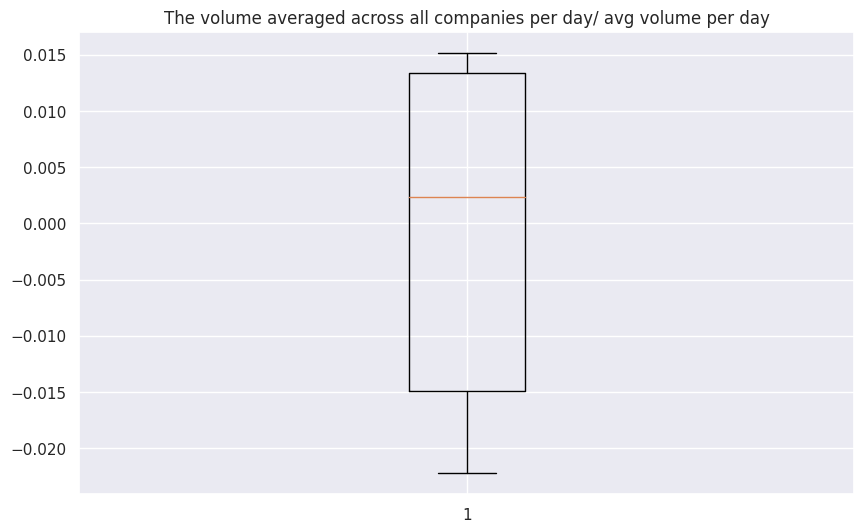

count    21.000000
mean     -0.000549
std       0.013304
min      -0.022167
25%      -0.014916
50%       0.002325
75%       0.013373
max       0.015173
Name: average, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title="The volume averaged across all companies per day/ avg volume per day")
df_volume_summary_stats = df_volume.describe()
df_volume_summary_stats['average'] = df_volume_summary_stats.mean(axis=1)
df_volume_summary_stats['average']


# Creating plot
plt.boxplot(df_price_plotting['average'])

# show plot
plt.show()
df_price_plotting['average'].describe()

### Analyzng the distributions over time

This time instead of averaging every companies price change per day we're going to look at every company's price change over one day and make a separate boxplot to show the changes in distribution across the week of the crash

on march 2nd there was  11  negative outliers and  12 positive outliers in the distribution
on march 9th there was  21  and  3 positive outliers in the distribution


on march 15th there was  7  and  1 positive outliers in the distribution




[Text(0.5, 1.0, 'Price percent changes on march 15th 2023')]

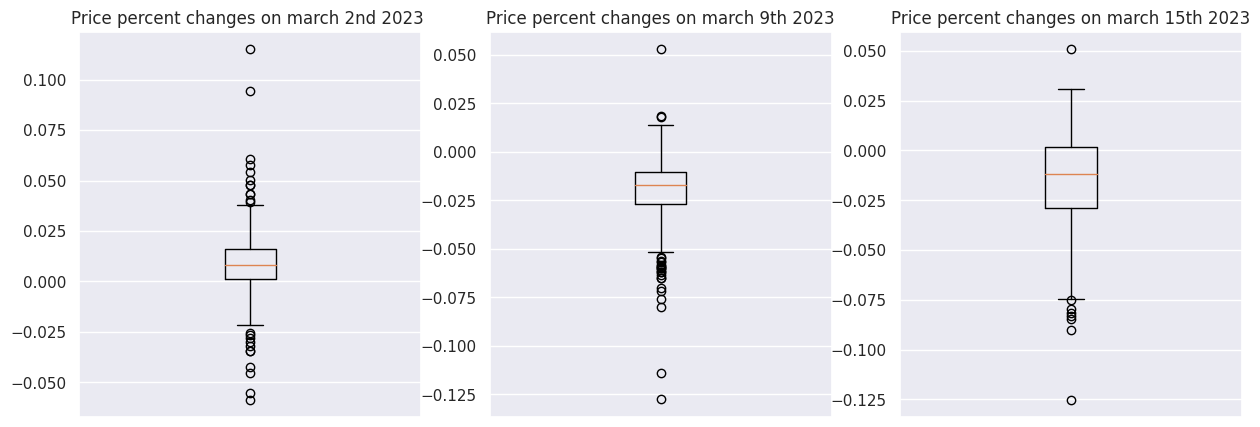

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3)
bxplt1 = ax1.boxplot(df_price_pct.loc['2023-03-02'])
bxplt2 = ax2.boxplot(df_price_pct.loc['2023-03-09'])
bxplt3 = ax3.boxplot(df_price_pct.loc['2023-03-15'])
ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)

outliers1 = bxplt1["fliers"][0].get_ydata()
outliers2 = bxplt2["fliers"][0].get_ydata()
outliers3 = bxplt3['fliers'][0].get_ydata()

neg_outliers1 = outliers1[outliers1<0]
neg_outliers2 = outliers2[outliers2<0]

print('on march 2nd there was ', len(neg_outliers1), ' negative outliers and ', len(outliers1[outliers1>0]), 'positive outliers in the distribution')
print('on march 9th there was ', len(neg_outliers2), ' and ', len(outliers2[outliers2>0]), 'positive outliers in the distribution\n\n')
print('on march 15th there was ', len(outliers3[outliers3<0]), ' and ', len(outliers3[outliers3>0]), 'positive outliers in the distribution\n\n')

ax1.set(title="Price percent changes on march 2nd 2023 ")
ax2.set(title="Price percent changes on march 9th 2023")
ax3.set(title= "Price percent changes on march 15th 2023")


This is also shown in the line graph showing how during the week of the crash, healthcare company ABT stayed consistent with the monthly trends while financial company charles schwab had one of its lowest price drops. Tesla, a silicon tech company had big drop on the 9th but rebounded pretty quickly

I wanted to show how the crash affects other sectors besides financial

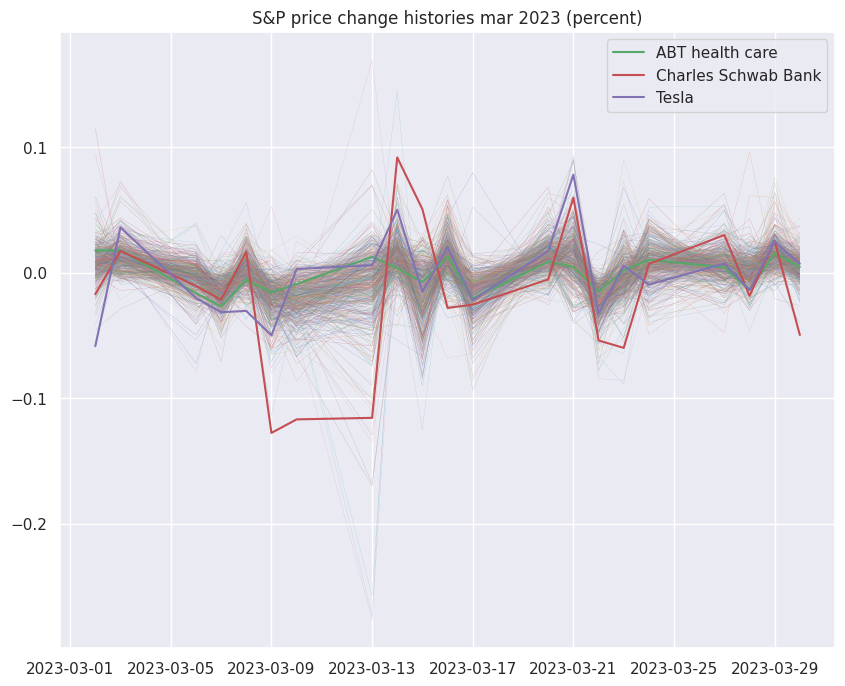

In [ ]:
plt.title('S&P price change histories mar 2023 (percent)')
plt.plot(df_price_pct, linewidth=0.10)
plt.plot(df_price_pct['ABT'], label='ABT health care', linewidth=1.5)
plt.plot(df_price_pct['SCHW'], label = 'Charles Schwab Bank', linewidth=1.5)
plt.plot(df_price_pct['TSLA'], label = 'Tesla', linewidth=1.5)
plt.legend()

## Not every company reacted the same way
In the original time series used for the file, JPMC and GS's price changes were consistent with each other throughout the month. However, when we set the timeseries to march 2023, during the week of the SVB crash they diverge drastically, this is because while GS suffered due to uncertaintiy w/ the economy, JPMC was in talks to accquire SVB thus their price sky rocketed so you can't definetively say every financial company suffered due to the crash.

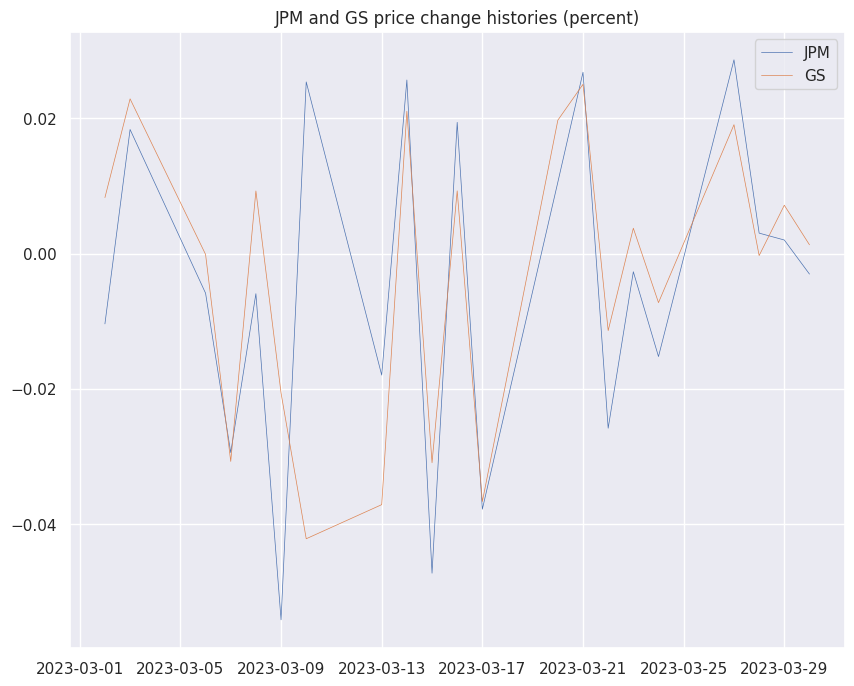

In [ ]:
plt.title('JPM and GS price change histories (percent)')
plt.plot(df_price_pct['JPM'], label='JPM', linewidth=0.5)
plt.plot(df_price_pct['GS'], label='GS', linewidth=0.5)
plt.legend()

In [ ]:
df_price_pct_summary_stats = df_price_pct.describe()
df_price_pct_summary_stats['average'] = df_price_pct_summary_stats.mean(axis=1)
print('summary statistics for price (not pct change) averaged across all companies')
#df_price_pct_summary_stats.head()
df_price_pct_summary_stats['average']

summary statistics for price (not pct change) averaged across all companies


,A,AAL,AAPL,ABBV,ABT,ACGL,ACN,ADBE,ADI,ADM,...,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,average
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,-0.000906,-0.004580,0.005384,0.000874,-0.000745,-0.001761,0.003552,0.008184,0.002905,0.000296,...,0.003196,-0.000410,0.001831,0.000734,0.001207,0.001947,0.001244,-0.021147,-0.000883,-0.000549
std,0.017747,0.024212,0.013562,0.011944,0.013572,0.027802,0.021722,0.022153,0.014419,0.018172,...,0.017603,0.020184,0.017526,0.015887,0.009177,0.011492,0.019928,0.072763,0.014342,0.019442
min,-0.031575,-0.054570,-0.014915,-0.021775,-0.026959,-0.068310,-0.026217,-0.033430,-0.019563,-0.028900,...,-0.028046,-0.049747,-0.035269,-0.033534,-0.018407,-0.018781,-0.033087,-0.257249,-0.035584,-0.039432
25%,-0.019442,-0.014670,-0.005454,-0.005732,-0.013711,-0.019937,-0.011545,-0.004827,-0.009290,-0.017053,...,-0.005354,-0.011779,-0.014957,-0.010911,-0.002853,-0.008929,-0.011935,-0.047580,-0.006819,-0.013447


## Saving correlation dataframes

In [ ]:
#df_price_pct.to_csv(os.path.join(data_dir, 'price_pct.csv'), index_label='date')
price_corr.to_csv(os.path.join(data_dir, 'price_corr.csv'), index_label='Symbol')
volume_corr.to_csv(os.path.join(data_dir, 'volume_corr.csv'))